In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.dummy import DummyRegressor

# Integrated Project 2

We have data regarding the extraction of gold from ore stored in 3 datasets. As the gold goes through extraction steps we will prepare the data for analysis, analyze the datasets, and build a ML model to help determine sMAPE for the data. 

## Prepare the Data

In [2]:
data_train = pd.read_csv('/datasets/gold_recovery_train.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full.csv')

### EDA

#### Train

In [3]:
data_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [5]:
data_train.duplicated().sum()

0

In [6]:
data_train.isnull().sum()

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64

#### Test

In [7]:
data_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [8]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [9]:
data_test.duplicated().sum()

0

In [10]:
data_test.isnull().sum()

date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


In [11]:
#Convert Train df [date] feature column datatype
data_train['date'] = pd.to_datetime(data_train['date'])
#Convert Full df [date] feature column datatype
data_full['date'] = pd.to_datetime(data_full['date'])
#Convert Test df [date] feature column datatype
data_test['date'] = pd.to_datetime(data_test['date'])

In [12]:
#Merge Test df with full dataset to add the missing target columns

data_test = data_test.merge(data_full[['date', 'rougher.output.recovery', 'final.output.recovery']],
                       how='left', on='date')

for col in ['rougher.output.recovery', 'final.output.recovery']:
    data_test[data_test[col]<0.001] = np.nan

In [13]:
#Check percentage of missing values in test dataset to determine if it's low enough to drop all missing records
null_percentage_test = data_test.isnull().sum().sum() / (data_test.shape[0] * data_train.shape[1 ]) * 100

print(f"Percentage of missing values in Test DF:{null_percentage_test: .2f}%")

#Missing values are low enough percentage of entire dataset to drop them
data_train = data_train.dropna()

Percentage of missing values in Test DF: 2.37%


In [14]:
#Replace the positive and negative infinity values
data_test.replace([np.inf, -np.inf], np.nan, inplace=True)
data_test.fillna(method='ffill', inplace=True)

#### Full

In [15]:
data_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [16]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                22716 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         22627 non-null  float64       
 2   final.output.concentrate_pb                         22629 non-null  float64       
 3   final.output.concentrate_sol                        22331 non-null  float64       
 4   final.output.concentrate_au                         22630 non-null  float64       
 5   final.output.recovery                               20753 non-null  float64       
 6   final.output.tail_ag                                22633 non-null  float64       
 7   final.output.tail_pb                                22516 non-null  float64       
 8   final.

In [17]:
data_full.duplicated().sum()

0

In [18]:
data_full.isnull().sum()

date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64

### Is Recovery calculated correctly?

We are given a column labeled rougher.output.recovery which is a calculated value column using an equation with the variables C, T, F (or concentrate, tail, and feed). We will now test if that column rougher.output.recovery was calculated correctly by running the function for recovery manually and see if we get a similar result.

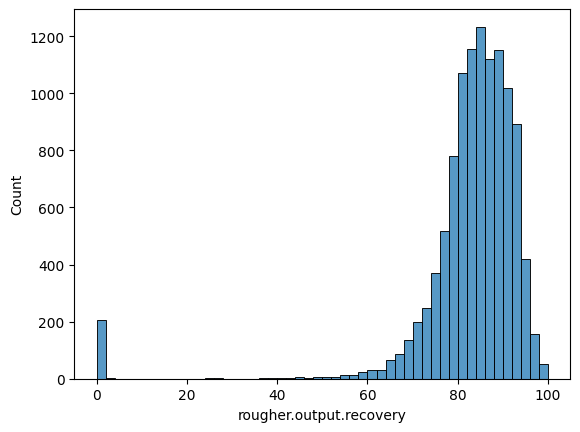

In [19]:
sns.histplot(data_train['rougher.output.recovery'], bins=50)
plt.show()

In [20]:
feed = data_train['rougher.input.feed_au']
concentrate = data_train['rougher.output.concentrate_au']
tail = data_train['rougher.output.tail_au']
actual_recovery = data_train['rougher.output.recovery']

# Perform the recovery calculation
calculated_recovery = (concentrate * (feed - tail)) / (feed * (concentrate - tail)) * 100

# Check for NaN values
print(f"Missing values for actual_recovery:", actual_recovery.isna().sum())
print(f"Missing values for calculated_recovery:", calculated_recovery.isna().sum())

# Check for infinite values
print(f"Values that are infinite in actual_recovery:", np.isinf(actual_recovery).sum())
print(f"Values that are infinite in calculated_recovery:",np.isinf(calculated_recovery).sum())

# Check for extremely large values
print(f"Value max in actual_recovery:",actual_recovery.max())
print(f"Value max in calculated_recovery:",calculated_recovery.max())

Missing values for actual_recovery: 0
Missing values for calculated_recovery: 0
Values that are infinite in actual_recovery: 0
Values that are infinite in calculated_recovery: 0
Value max in actual_recovery: 100.0
Value max in calculated_recovery: 100.0


In [21]:
# Combine the conditions to filter out problematic rows
clean_mask = ~(actual_recovery.isna() | calculated_recovery.isna() | np.isinf(actual_recovery) | np.isinf(calculated_recovery))

# Filter the data
actual_recovery_clean = actual_recovery[clean_mask]
calculated_recovery_clean = calculated_recovery[clean_mask]

In [22]:
print(f"Missing values for actual_recovery_clean:", actual_recovery_clean.isna().sum())
print(f"Missing values for calculated_recovery_clean:", calculated_recovery_clean.isna().sum())
print(f"Values that are infinite in actual_recovery_clean:", np.isinf(actual_recovery_clean).sum())
print(f"Values that are infinite in calculated_recovery_clean:", np.isinf(calculated_recovery_clean).sum())
print(f"Value max in actual_recovery_clean:", actual_recovery_clean.max())
print(f"Value max in calculated_recovery_clean:", calculated_recovery_clean.max())

Missing values for actual_recovery_clean: 0
Missing values for calculated_recovery_clean: 0
Values that are infinite in actual_recovery_clean: 0
Values that are infinite in calculated_recovery_clean: 0
Value max in actual_recovery_clean: 100.0
Value max in calculated_recovery_clean: 100.0


In [23]:
# Calculate MAE
mae = mean_absolute_error(actual_recovery_clean, calculated_recovery_clean)
print("Mean Absolute Error: ", mae)

Mean Absolute Error:  9.460144184559453e-15


After calculating the MAE between the recovery given in our dataset and the calculated recovery performed with the calculated_recovery function we get a very low MAE value (9.3e-15). This tells us that the recovery values given to us in the dataset are accurate. However, we need to note that certain values within our calculated recovery equation yielded infinite values due to missing values or zero values which were dropped before our calculation was executed sucessfully. 

### Analyze the features not present in the Test Data

In [24]:
#Columns present in both datasets
train_test_columns = list(set(data_train.columns).intersection(set(data_test.columns)))
train_test_columns.sort()
train_test_columns

['date',
 'final.output.recovery',
 'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.sulfate',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_air',
 'primary_cleaner.state.floatbank8_d_level',
 'rougher.input.feed_ag',
 'rougher.input.feed_au',
 'rougher.input.feed_pb',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.feed_sol',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_sulfate',
 'rougher.input.floatbank11_xanthate',
 'rougher.output.recovery',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.fl

Here we have a list of all the features that are not present in the test data. A cursory analysis shows that many of these features are calculations or outputs of material which suggests later stage data after some sort of refinement. 

### Data Preprocessing

In [25]:
data_train['date']=pd.to_datetime(data_train['date'])
data_test['date']=pd.to_datetime(data_test['date'])

## Analyze the data

### Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.

In [26]:
au_columns = ['rougher.input.feed_au', 'rougher.output.concentrate_au', 'final.output.concentrate_au']
ag_columns = ['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'final.output.concentrate_ag']
pb_columns =['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'final.output.concentrate_pb']

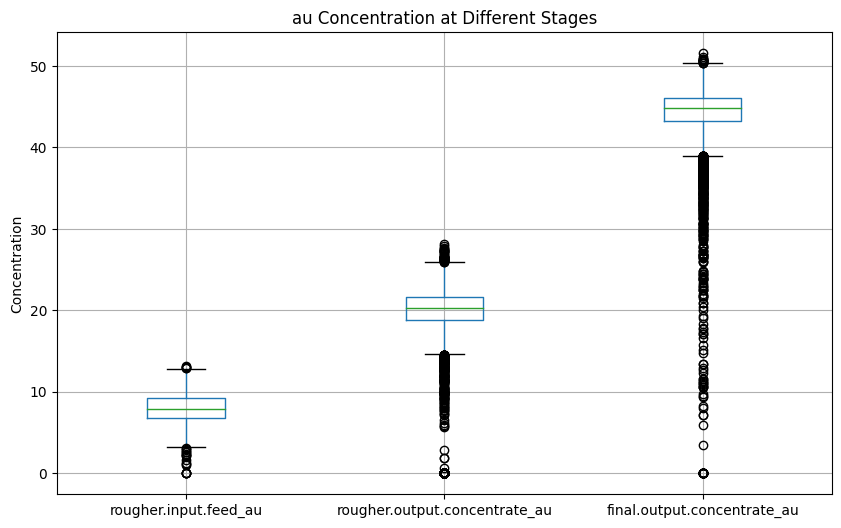

In [27]:
plt.figure(figsize=(10, 6))
data_train[au_columns].boxplot()
plt.title(f'au Concentration at Different Stages')
plt.ylabel('Concentration')
plt.show()

Concentration of au (Gold) increases consistently through each stage of the refinement process. The average concentration at the rougher.input stage is under 10 and in the final stage is over 40 which is in line with what we expect from this process. 

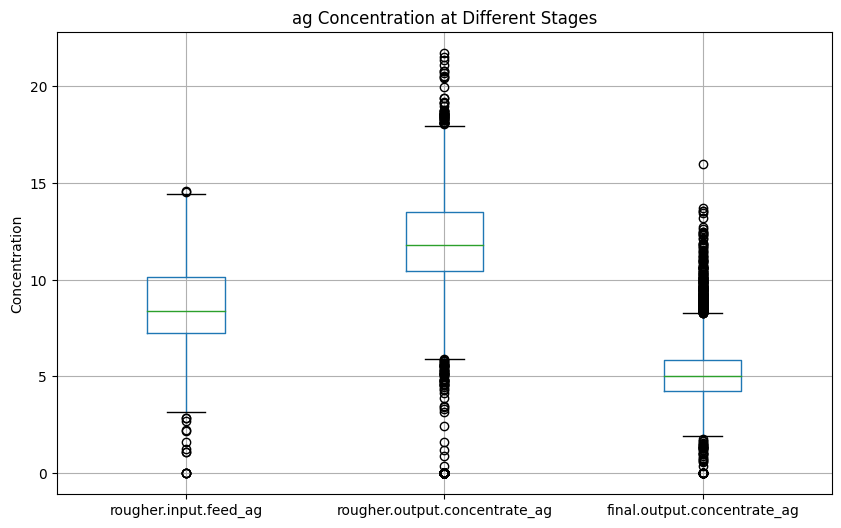

In [28]:
plt.figure(figsize=(10, 6))
data_train[ag_columns].boxplot()
plt.title(f'ag Concentration at Different Stages')
plt.ylabel('Concentration')
plt.show()

Here we see the ag concentrations at each stage in the bar graph. There does seem to be an initial increase in the average concentration from the rougher.input stage to the rougher.output stage but a decline by the end of the process.

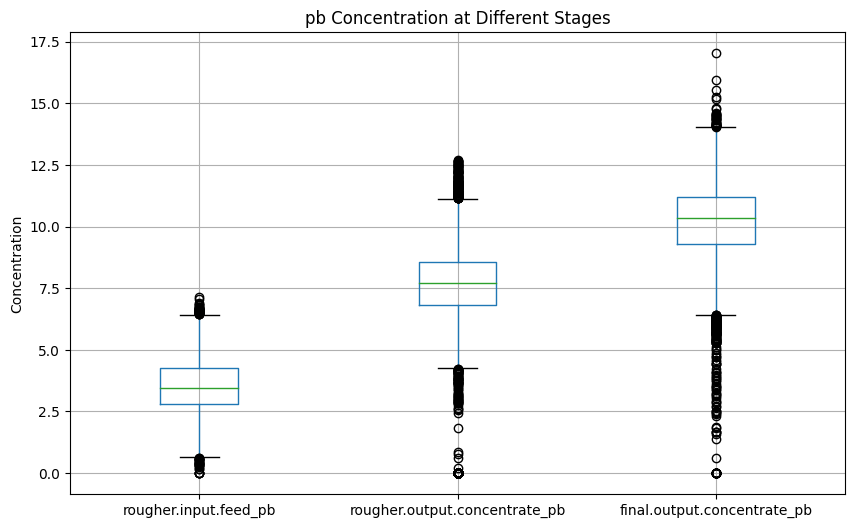

In [29]:
plt.figure(figsize=(10, 6))
data_train[pb_columns].boxplot()
plt.title(f'pb Concentration at Different Stages')
plt.ylabel('Concentration')
plt.show()

Like au, pb concentrations increase through each phase of refinement. In the rougher.input stage we have an average pb concentration under 5 and in the final output it is over 10. 

### Compare Feed Particle Size Distribution

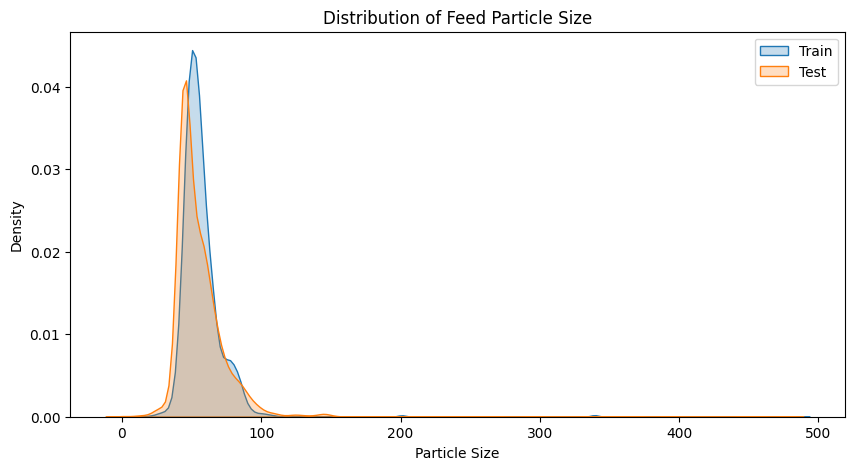

In [30]:
# Identify feed particle size columns
feed_particle_columns = ['rougher.input.feed_size']

for col in feed_particle_columns:
    plt.figure(figsize=(10, 5))
    sns.kdeplot(data_train[col], label='Train', shade=True)
    sns.kdeplot(data_test[col], label='Test', shade=True)
    plt.title(f'Distribution of Feed Particle Size')
    plt.xlabel('Particle Size')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

Here we see a distribution of particle feed sizes in our test and training datasets. While there do appear to be some differences in the distributions, they do not vary from each other significantly.

### Analyze Total Concentrations at Different Stages

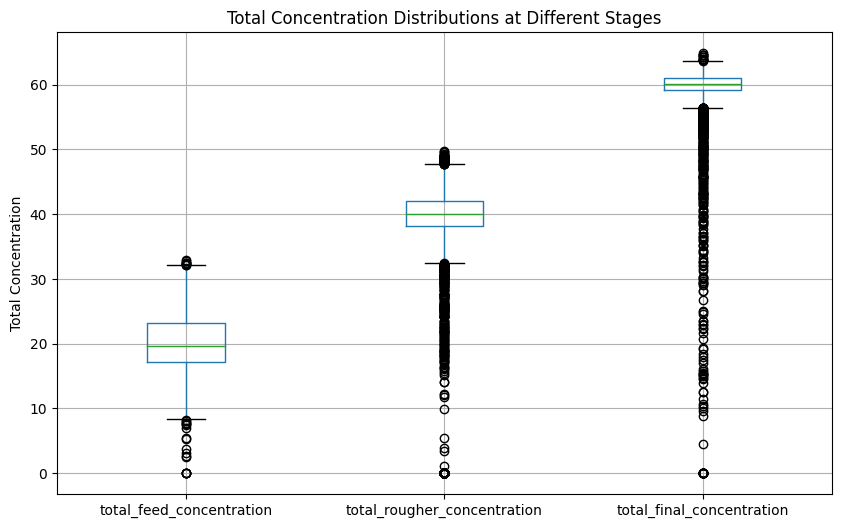

In [31]:
# Calculate total concentration at different stages
data_train['total_feed_concentration'] = data_train[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb']].sum(axis=1)
data_train['total_rougher_concentration'] = data_train[['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb']].sum(axis=1)
data_train['total_final_concentration'] = data_train[['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb']].sum(axis=1)

# Plotting distributions of total concentrations
plt.figure(figsize=(10,6))
data_train[['total_feed_concentration', 'total_rougher_concentration', 'total_final_concentration']].boxplot()
plt.title('Total Concentration Distributions at Different Stages')
plt.ylabel('Total Concentration')
plt.show()

# Identify and remove anomalies if necessary
# For example: values beyond a certain threshold based on quantiles
q_low = data_train['total_feed_concentration'].quantile(0.05)
q_high = data_train['total_feed_concentration'].quantile(0.95)
data_train_filtered= data_train[(data_train['total_feed_concentration'] > q_low) & (data_train['total_feed_concentration'] < q_high)]


Here we see a distribution of total concentration of all substances across all stages. We notice a significant number of outliers that should be addressed in our data which we will filter out as to not affect our model accuracy. I decided to filter out the top 5% and bottom 5% of the data in total feed concentration. 

This is our final filtered data distribution without our top 5% and bottom 5% of results.

## Model Creation

In [32]:
#Create target and features
target = ['rougher.output.recovery', 'final.output.recovery']
#features = train_test_columns[1:]

In [33]:
features = np.asarray(train_test_columns[1:])
idx = np.where(~np.isin(features,target))[0]
features = features[idx].tolist()

In [34]:
#target = ['rougher.output.recovery', 'final.output.recovery']

# Drop the target columns from the list
#features = [column for column in train_test_columns if column not in target]

#print(features)

In [35]:
#Create X and y train and test datasets
X_train, X_test = data_train[features].values, data_test[features].values
y_train, y_test = data_train[target].values, data_test[target].values

### Write sMAPE function

In [36]:
# sMAPE calculation function
def smape(y_true, y_pred, epsilon=1e-10):
    # Debugging: Check shapes
    print(f"y_true shape: {y_true.shape}, y_pred shape: {y_pred.shape}")
    
    if y_true.shape != y_pred.shape:
        raise ValueError(f"Shape of y_true {y_true.shape} and y_pred {y_pred.shape} must be the same.")
    
    numerator = np.abs(y_pred - y_true)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0 + epsilon  # Adding epsilon to the denominator
    # Avoid division by zero or NaN
    valid_mask = (denominator != 0) & (~np.isnan(denominator))
    if valid_mask.sum() == 0:
        return 0  # Return 0 if all denominators are zero or NaN
    smape = np.mean(np.where(valid_mask, numerator / denominator, 0)) * 100
    return smape

# Final sMAPE calculation function
def final_smape(y_true, y_pred):
    # Ensure y_true and y_pred have correct number of columns for indexing
    if y_true.shape[1] < 2 or y_pred.shape[1] < 2:
        raise ValueError("y_true and y_pred must have at least two columns for rougher and final outputs respectively.")
    
    print(f"Shapes in final_smape: y_true {y_true.shape}, y_pred {y_pred.shape}")
    
    rougher_output = smape(y_true[:, 0], y_pred[:, 0])
    final_output = smape(y_true[:, 1], y_pred[:, 1])
    return 0.25 * rougher_output + 0.75 * final_output

# Create sMAPE score for use in model tuning
# negate the output to ensure it's always positive
smape_score = make_scorer(final_smape, greater_is_better=False)

### Create models

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import scipy.stats

# Define the parameter distributions for RandomForestRegressor
param_dist = {
    'n_estimators': scipy.stats.randint(50, 200),
    'max_depth': [None, 10, 20],
    'min_samples_split': scipy.stats.randint(2, 10),
    'min_samples_leaf': scipy.stats.randint(1, 5)
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV with sMAPE as the scoring metric and fewer iterations
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   scoring=smape_score, cv=3, n_iter=2, verbose=2,
                                   n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV to find the best hyperparameters
random_search.fit(X_train, y_train)

# Get the best model from RandomizedSearchCV
best_rf = random_search.best_estimator_

# Now, you can include the best_rf in your models list along with other models
models = [
    LinearRegression(),
    best_rf  # Use the best hyperparameter-tuned RandomForest
]

# Cross-validate models with final smape scoring
for model in models:
    model_name = model.__class__.__name__
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=smape_score)
    print(f'{model_name} Final sMAPE: {cv_scores.mean()}')



Fitting 3 folds for each of 2 candidates, totalling 6 fits
Shapes in final_smape: y_true (3673, 2), y_pred (3673, 2)
y_true shape: (3673,), y_pred shape: (3673,)
y_true shape: (3673,), y_pred shape: (3673,)
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=6, n_estimators=64; total time=  17.4s
Shapes in final_smape: y_true (3672, 2), y_pred (3672, 2)
y_true shape: (3672,), y_pred shape: (3672,)
y_true shape: (3672,), y_pred shape: (3672,)
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=6, n_estimators=64; total time=  15.4s
Shapes in final_smape: y_true (3672, 2), y_pred (3672, 2)
y_true shape: (3672,), y_pred shape: (3672,)
y_true shape: (3672,), y_pred shape: (3672,)
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=6, n_estimators=64; total time=  16.6s
Shapes in final_smape: y_true (3673, 2), y_pred (3673, 2)
y_true shape: (3673,), y_pred shape: (3673,)
y_true shape: (3673,), y_pred shape: (3673,)
[CV] END max_depth=20, min_samples_leaf=4, min_sa

In [38]:
rf_prediction= best_rf.predict(X_test)

final_smape_rf = final_smape(y_test, rf_prediction)

print(f'Best RF Final sMAPE on Test Set: {final_smape_rf}')

Shapes in final_smape: y_true (5856, 2), y_pred (5856, 2)
y_true shape: (5856,), y_pred shape: (5856,)
y_true shape: (5856,), y_pred shape: (5856,)
Best RF Final sMAPE on Test Set: 9.226486567648793


In [39]:
#Check against baseline dummy regressor

dummy_reg = DummyRegressor(strategy='mean')

dummy_reg.fit(X_train, y_train)
dummy_pred = dummy_reg.predict(X_test)

final_smape_dummy = final_smape(y_test, dummy_pred)

print(f'Dummy Regressor Final sMAPE on Test Set: {final_smape_dummy}')

Shapes in final_smape: y_true (5856, 2), y_pred (5856, 2)
y_true shape: (5856,), y_pred shape: (5856,)
y_true shape: (5856,), y_pred shape: (5856,)
Dummy Regressor Final sMAPE on Test Set: 10.00136818872465


# Conclusion

Here we see that our random forrest model had the best cross validation final sMAPE score before fitting. We used this model against our dummy regressor baseline. The final sMAPE was minimally better than the Dummy Regressor score.

During this project we:
1. Prepared and analyzed three sets of data
2. Looked at particle size distribution across different stages of refinement
3. Created ML model to determine sMAPE scores for our data and used it to determine which model best predicted our results